### 1) Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [2]:
string = 'Name1 Surname1, Name2 Surname2, …'

In [4]:
names_lis = string.split(', ')
names_lis

['Name1 Surname1', 'Name2 Surname2', '…']

### 2) В переменной df содержатся данные как на картинке task2.png (находится в папке с заданием)
Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35


In [6]:
import pandas as pd

In [9]:
df = pd.DataFrame({
    'client_id':[9002,6722,8799,8737,5208],
    'sex':[1,1,1,0,0],
    'wealth':['medium','high','high','low','medium'],
    'age':[63,54,62,54,37]
})

In [12]:
medium_35 = df.query('wealth == "medium" and age > 35')

### 3) Ваш коллега-новичок перепутал названия колонок в таблице из предыдущих заданий и прислал вам такой вариант task3.png (находится в папке с заданием)
Приведите таблицу к каноничному виду, сохранив её в ту же переменную df, где сейчас находится нестандартно наименнованная таблица (воспользуйтесь методом rename)

Note: колонка называется Клиент id - шрифт плохо передаёт кейс i в id


In [13]:
df.rename(columns = {'client_id':'Клиент id',
    'sex':'Пол',
    'wealth': 'Благосостояние',
    'age':'Возраст'})

,Клиент id,Пол,Благосостояние,Возраст
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


### 4)Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться больше ли возраст 30 лет (булиновское значение)

In [16]:
df['older_than_30'] = df.age > 30
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


### 5) А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num


In [18]:
df.nunique()

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

### 6) У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида: task6.png
Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать переменные иногда бывает сложно)

In [24]:
data = pd.DataFrame({
    'client_id':[9002,9581,7250,8619,6573],
    'amount':[42331,88420,1714,80572,57549],
    'date':[1585425830,1585429536,1585427761,1585427077,1585426290]
})
data

,client_id,amount,date
0,9002,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


In [27]:
full_data=data.merge(df, how='inner', on='client_id')
full_data

,client_id,amount,date,sex,wealth,age,older_than_30
0,9002,42331,1585425830,1,medium,63,True


### 7)💀 Сложное задание! 💀
А теперь создадим свою собственную функцию!

Напишите функцию read_n_agg, которая 
- принимает на вход один параметр – путь к файлу
- считывает переданный файл, в котором разделителем является ;
- считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
- возвращает результат этих действий (агрегированный датафрэйм)

Данные выглядят как в task7.png, датасэт в файле companies.csv

In [30]:
def read_n_agg(path):
    import pandas as pd
    df = pd.read_csv(path, encoding='utf-8', sep=';')
    return(
        df
        .groupby('company', as_index=True)
        .aggregate({'income':'mean'})
    )

In [31]:
read_n_agg(r'C:\Users\arkhi\Jupyter notebook\data\companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


### 8) Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!
- journey_id – уникальный id поездки
- user_id – id пользователя
- driver_id – id водителя
- taxi_id – id машины
- icon – тип поездки
- start_type – тип заказа (asap, reserved, delayed)
- start_at – время начала поездки
- start_lat – исходное местоположение пользователя, широта
- start_lon – исходное местоположение пользователя, долгота
- end_at – время окончания поездки
- end_lat – итоговое местоположение, широта
- end_lon – итоговое местоположение, долгота
- end_state – состояние заказа
- driver_start_lat – исходное местоположение водителя, широта
- driver_start_lon – исходное местоположение водителя, долгота
- arrived_at – время прибытия водителя
- source – платформа, с которой сделан заказ
- driver_score – оценка водителя клиентом
- rider_score – оценка клиента водителем

Импортируйте pandas как pd. 

Загрузите датасет, используя ; в качестве разделителя. 

Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.

Может пригодиться: read_csv()

Датасет для задания: taxi_peru.csv (в папке).

In [ ]:
import pandas as pd

In [42]:
taxi= pd.read_csv(r'C:\Users\arkhi\Jupyter notebook\data\taxi_peru.csv',
                  encoding='utf-8', 
                  sep=';', 
                  parse_dates=['start_at', 'end_at', 'arrived_at'])

In [46]:
taxi.dtypes.value_counts()

object            14
datetime64[ns]     3
float64            2
dtype: int64

### 9) Проверьте, с какой платформы было сделано больше всего заказов. 

В ответе укажите значение в %, округлённое до целого.

In [66]:
# первый вариант
top_source = taxi.value_counts('source').head(1) / taxi.shape[0]
top_source = round(top_source*100)
top_source

source
iPhone    42.0
dtype: float64

In [80]:
# второй вариант
(
    taxi
    .source
    .value_counts(normalize = True) # 'normalize' для выражения в долях
    .mul(100) # то же, что и умножение
    .round()
    .max()
)

42.0

### 10) Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts

Полезные функции:

.mul() – умножение, более удобный вариант для использования в цепочке методов 

.round() – округление

.reset_index() – сбросить индекс

.value_counts() – сколько раз встречается каждое значение переменной

In [81]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [86]:
#Посчитайте частоту встречаемости каждой из оценок
taxi.driver_score.value_counts()

5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64

In [94]:
#Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
(
    taxi
    .driver_score
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

In [96]:
#Сбросьте индексы
(
    taxi
    .driver_score
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
)

,index,driver_score
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [97]:
#Переименуйте колонки в driver_score и percentage
(
    taxi
    .driver_score
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'index':'driver_score','driver_score':'percentage'})
)

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [98]:
#Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
(
    taxi
    .driver_score
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'index':'driver_score','driver_score':'percentage'})
    .sort_values('driver_score')
)

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [101]:
# Запишите результат в driver_score_counts
driver_score_counts = (
                        taxi
                        .driver_score
                        .value_counts(normalize=True)
                        .mul(100)
                        .round(2)
                        .reset_index()
                        .rename(columns={'index':'driver_score','driver_score':'percentage'})
                        .sort_values('driver_score')
)

### 11) Теперь строим график! (task11.png) Сначала импортируем библиотеки:
```
import seaborn as sns
import matplotlib.pyplot as plt
```
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:
```    
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()
```


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

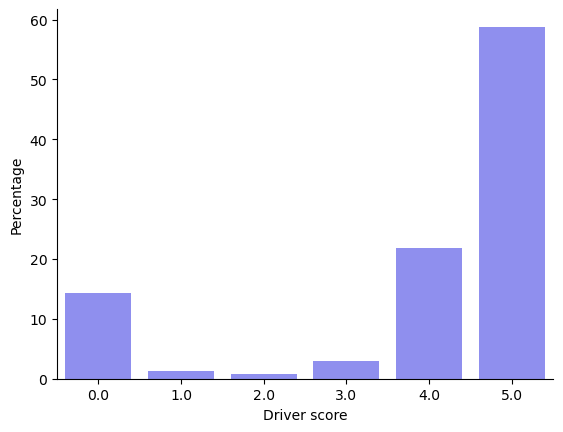

In [106]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

### 12) 💀 Сложное задание! 💀
Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [107]:
rider_score_counts = (
                        taxi
                        .rider_score
                        .value_counts(normalize=True)
                        .mul(100)
                        .round(2)
                        .reset_index()
                        .rename(columns={'index':'rider_score','rider_score':'percentage'})
                        .sort_values('rider_score')
)

In [108]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


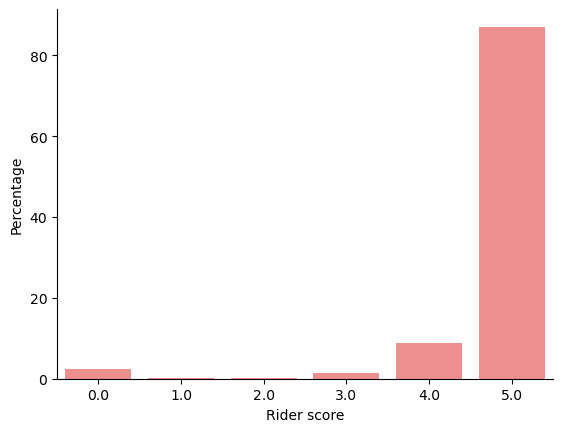

In [109]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='red', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()

# That's all!!!